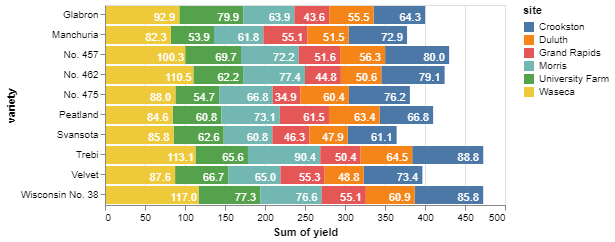

In [11]:
import altair as alt
import pandas as pd
from vega_datasets import data

df=data.barley()

bars=alt.Chart(df).mark_bar().encode(
    x=alt.X('sum(yield)',stack='zero'),
    y=alt.Y('variety'),
    color=alt.Color('site')
)

text=alt.Chart(df).mark_text(dx=-15, dy=3).encode(
    y=alt.Y('variety'),
    x=alt.X('sum(yield)',  stack='zero'),
    color=alt.Color('site', legend=None, scale=alt.Scale(range=['white'])),
    text=alt.Text('sum(yield)',format='.1f')
)

#alt.layer(bars, text, data=df).resolve_scale(color='independent')
alt.layer(bars, text).resolve_scale(color='independent')


In [12]:
data = pd.read_csv('./Pats_penalty_plays_2009_2019.csv')

In [14]:
data

,season,home,away,week,score_home,score_away,winner,loser,team_possesion,field_position,...,team_possesion_cat,team_penalty_cat,penalty_side,opportunity,yards_to_go,week_type,one_posession_game,pats_points,opps_points,game_winner_cat
0,2009,NE,BUF,1,25,24,NE,BUF,BUF,BUF 43,...,Oponente,Oponente,Castigo Ofensivo,3.0,7.0,1,Juego de una posesión,25,24,NE
1,2009,NE,BUF,1,25,24,NE,BUF,NE,NE 30,...,NE,NE,Castigo Ofensivo,2.0,8.0,1,Juego de una posesión,25,24,NE
2,2009,NE,BUF,1,25,24,NE,BUF,NE,NE 45,...,NE,Oponente,Castigo Defensivo,1.0,10.0,1,Juego de una posesión,25,24,NE
3,2009,NE,BUF,1,25,24,NE,BUF,BUF,BUF 48,...,Oponente,NE,Castigo Defensivo,1.0,10.0,1,Juego de una posesión,25,24,NE
4,2009,NE,BUF,1,25,24,NE,BUF,BUF,NE 43,...,Oponente,Oponente,Castigo Ofensivo,2.0,1.0,1,Juego de una posesión,25,24,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2294,2017,NE,PHI,4,33,41,PHI,NE,NE,NE 26,...,NE,NE,Castigo Ofensivo,2.0,2.0,Super Tazón,Juego de una posesión,33,41,Oponente
2295,2017,NE,PHI,4,33,41,PHI,NE,PHI,PHI 25,...,Oponente,Oponente,Castigo Ofensivo,1.0,10.0,Super Tazón,Juego de una posesión,33,41,Oponente
2296,2017,NE,PHI,4,33,41,PHI,NE,NE,NE 14,...,NE,Oponente,Castigo Defensivo,3.0,6.0,Super Tazón,Juego de una posesión,33,41,Oponente
2297,2017,NE,PHI,4,33,41,PHI,NE,NE,NE 35,...,NE,Oponente,Castigo Defensivo,NaN,NaN,Super Tazón,Juego de una posesión,33,41,Oponente


In [15]:
from datetime import datetime
#Create column for minute:second in time left
#Esta función pone los minutos como horas y los segundos como minutos. 
#Voy a quedarme sólo con los minutos para ver si son los 5 finales
data["mytime"]=pd.to_datetime(data["time_left_qtr"]).dt.hour
data["mytime"]

0       12.0
1       11.0
2        9.0
3        5.0
4        5.0
        ... 
2294     2.0
2295     7.0
2296     4.0
2297     NaN
2298     6.0
Name: mytime, Length: 2299, dtype: float64

In [16]:
def corregir_semana_sb(df):
    if df.game_type == 'POST':
        if df.week == 1:
            return "Wildcard"
        elif df.week == 2:
            return "Ronda Divisional"
        elif df.week == 3:
            return "Ronda Campeonato"
        else:
            return "Super Tazón"

data["myweek"]=data.apply(corregir_semana_sb,axis=1)

In [17]:
df_4q_5min_post =data[(data.mytime-5 < 0)  & 
     (data.quarter == 'Q4') &
     (data.game_type=='POST') &
     (data.team_penalty_cat != 'NE')].groupby(["myweek","penalty_side"])["myweek"].count().reset_index(name="count_pen")

df_4q_5min_post

,myweek,penalty_side,count_pen
0,Ronda Campeonato,Castigo Defensivo,1
1,Ronda Campeonato,Castigo Ofensivo,1
2,Ronda Divisional,Castigo Defensivo,2
3,Ronda Divisional,Castigo Ofensivo,3
4,Super Tazón,Castigo Defensivo,3
5,Super Tazón,Castigo Ofensivo,1
6,Wildcard,Castigo Ofensivo,1


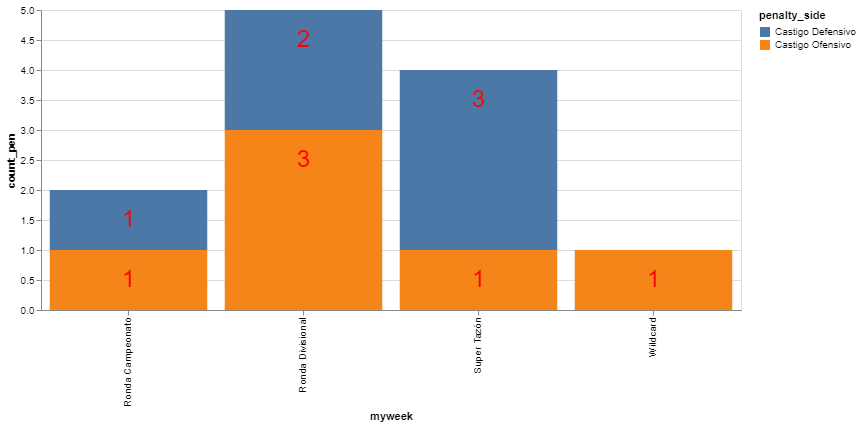

In [36]:
bar_5min_post = alt.Chart(df_4q_5min_post).mark_bar().encode(
   x =alt.X("myweek:N"),
    y=alt.Y("count_pen:Q", stack='zero'),    
    color=alt.Color('penalty_side')
).properties(
width= 700,
height=300)

text_5min_post = alt.Chart(df_4q_5min_post).mark_text(
    #font="Courier",
    fontSize=24,
    dy=30, 
    color='red'
).encode(
     x =alt.X("myweek:N"),
     y=alt.Y("count_pen:Q", stack='zero'),    
     detail='penalty_side:N',
     text=alt.Text('count_pen:Q', )
).properties(
width= 700,
height=300)

#alt.layer( text_5min_post )#.resolve_scale(color='independent')
 
bar_5min_post + text_5min_post

In [37]:
from vega_datasets import data

iris = data.iris.url

In [39]:
iris

'https://vega.github.io/vega-datasets/data/iris.json'

In [1]:
import altair as alt
import pandas as pd
import numpy as np
print(alt.__version__)


4.0.0


In [4]:
data_url = 'http://bit.ly/2cLzoxH'
gapminder = pd.read_csv(data_url)

In [5]:
gapminder['log2_gdpPercap']=np.log2(gapminder['gdpPercap'])
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap,log2_gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,9.606304
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,9.680980
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,9.736572
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.707699
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.531345


In [7]:
Scatter_Plot_Altair = alt.Chart(gapminder).mark_point().encode(
    x=alt.X('lifeExp', scale=alt.Scale(domain=(20, 90))),
    y=alt.Y('log2_gdpPercap',scale=alt.Scale(domain=(6, 18)))
)
Scatter_Plot_Altair 

alt.Chart(...)

In [8]:
Scatter_Plot_Altair.transform_regression('lifeExp', 'log2_gdpPercap',method="linear"
).mark_line(color="red")

alt.Chart(...)

In [10]:
Scatter_Plot_Altair  +       Scatter_Plot_Altair.transform_regression('lifeExp',
                          'log2_gdpPercap',method="poly"
).mark_line(color="red")

alt.LayerChart(...)